In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load dataset
data_df = pd.read_csv("/home/raven/Kawuma/Failure Predictor/datasets/Summary_data_system_Failures.csv")
data_df.describe()

,year,Application,Admision,Academic,student Portal
count,24.000000,21.000000,22.000000,20.000000,20.000000
mean,2009.541667,54.619048,80.318182,94.900000,82.100000
std,8.792186,17.599648,21.234263,5.046103,13.916669
min,1996.000000,27.000000,0.000000,84.000000,50.000000
25%,2002.750000,38.000000,75.000000,91.500000,75.000000
50%,2008.500000,57.000000,80.000000,95.500000,82.500000
75%,2018.250000,62.000000,93.750000,100.000000,91.750000
max,2024.000000,100.000000,100.000000,100.000000,100.000000


In [9]:
# Clean the dataset first
data_df.dropna(how='all', inplace=True)
data_df.fillna(data_df.mean(numeric_only=True), inplace=True)

clean_df = data_df.sort_values("year").reset_index(drop=True)

print("Cleaned dataset shape:", clean_df.shape)
print(clean_df.isna().sum())

Cleaned dataset shape: (24, 5)
year              0
Application       0
Admision          0
Academic          0
student Portal    0
dtype: int64


In [13]:
# Split the dataset
X = clean_df["year"].values.reshape(-1, 1)

targets = [col for col in clean_df.columns if col != "year"]
print("Target columns:", targets)


Target columns: ['Application ', 'Admision ', 'Academic', 'student Portal']


In [14]:
# Train linear regression models and predict future failures

models = {}
future_years = np.arange(2026, 2036).reshape(-1, 1)
future_predictions = {}

for target in targets:
    model = LinearRegression()
    model.fit(X, clean_df[target])
    models[target] = model
    future_predictions[target] = model.predict(future_years)


In [15]:
forecast_df = pd.DataFrame({"Year": future_years.flatten()})
for target in targets:
    forecast_df[target] = future_predictions[target].round(2)

print(forecast_df)
forecast_df.to_csv("AIMS_Cleaned_Failure_Forecast_2026_2035.csv", index=False)


   Year  Application   Admision   Academic  student Portal
0  2026         55.94      65.99     96.53           80.23
1  2027         56.02      65.12     96.63           80.12
2  2028         56.10      64.25     96.73           80.00
3  2029         56.18      63.38     96.83           79.89
4  2030         56.26      62.50     96.92           79.77
5  2031         56.34      61.63     97.02           79.66
6  2032         56.42      60.76     97.12           79.55
7  2033         56.50      59.89     97.22           79.43
8  2034         56.58      59.02     97.32           79.32
9  2035         56.67      58.15     97.42           79.21


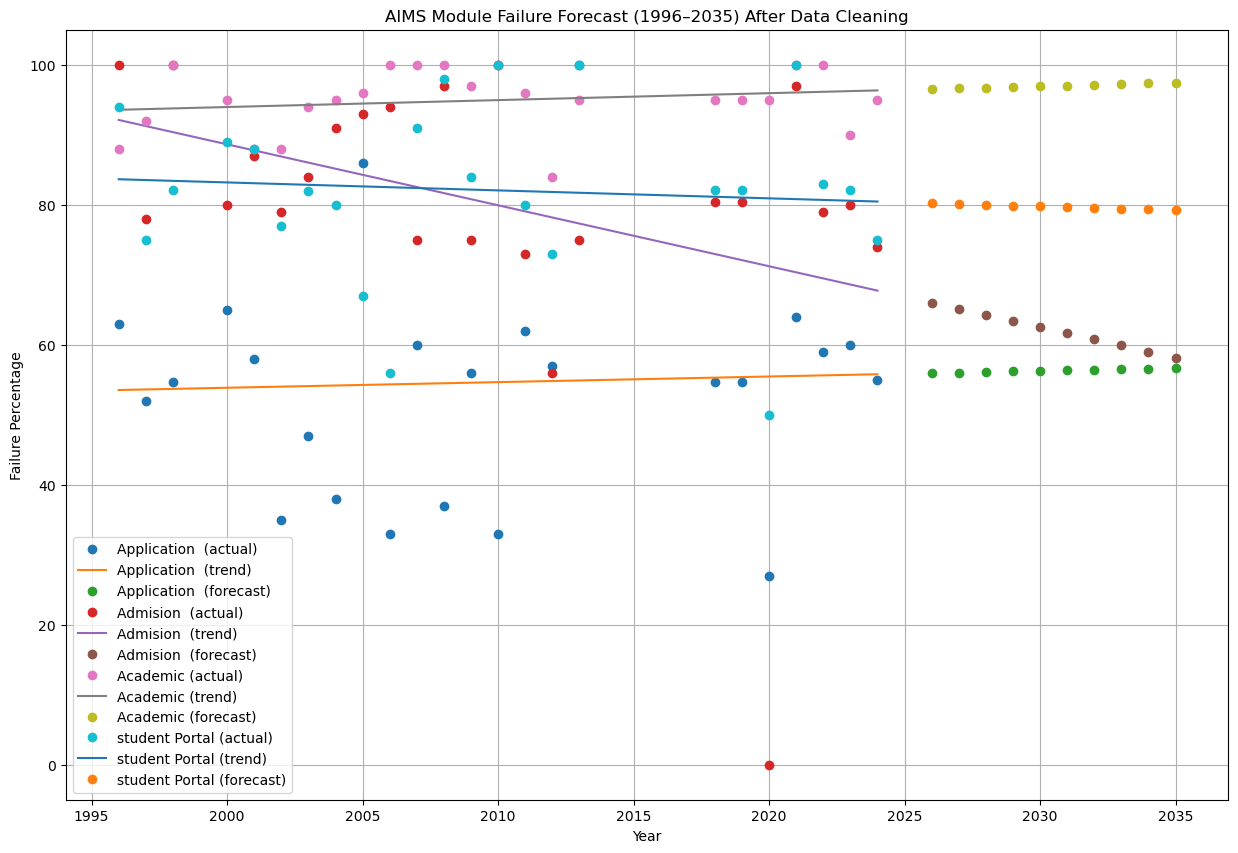

In [25]:
plt.figure(figsize=(15, 10))
for target in targets:
    plt.plot(clean_df["year"], clean_df[target], 'o', label=f"{target} (actual)")
    plt.plot(clean_df["year"], models[target].predict(X), '-', label=f"{target} (trend)")
    plt.plot(future_years, future_predictions[target], 'o', label=f"{target} (forecast)")

plt.xlabel("Year")
plt.ylabel("Failure Percentage")
plt.title("AIMS Module Failure Forecast (1996–2035) After Data Cleaning")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
for target in targets:
    y_true = clean_df[target]
    y_pred = models[target].predict(X)
    print(f"{target} R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"{target} MAE Score: {mean_squared_error(y_true, y_pred):.4f}")


Application  R² Score: 0.0019
Application  MAE Score: 257.6444
Admision  R² Score: 0.1424
Admision  MAE Score: 338.3679
Academic R² Score: 0.0360
Academic MAE Score: 19.4332
student Portal R² Score: 0.0062
student Portal MAE Score: 152.3678
